
**Importing Libraries**


In [1]:
import cv2
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from imutils import paths
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from PIL import Image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import glob

**Defining Path**

In [2]:
from google.colab import drive
df = drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
for current_folder in glob.glob ('/content/drive/My Drive/tb/*'):
  print (current_folder)

/content/drive/My Drive/tb/Tuberculosis
/content/drive/My Drive/tb/Normal


**Working with Data**

In [24]:
Normal=[]
for name1 in glob.glob ('/content/drive/My Drive/tb/Normal/*'):
  Normal.append(name1)

In [26]:
len(Normal)

3500

In [27]:
Tuberculosis=[]
for name2 in glob.glob ('/content/drive/My Drive/tb/Tuberculosis/*'):
  Tuberculosis.append(name2)

In [28]:
len(Tuberculosis)

700

**Joining both the folders**

In [29]:
files=Normal+Tuberculosis

In [30]:
files

['/content/drive/My Drive/tb/Normal/Normal-3362.png',
 '/content/drive/My Drive/tb/Normal/Normal-3287.png',
 '/content/drive/My Drive/tb/Normal/Normal-3359.png',
 '/content/drive/My Drive/tb/Normal/Normal-3353.png',
 '/content/drive/My Drive/tb/Normal/Normal-3338.png',
 '/content/drive/My Drive/tb/Normal/Normal-3257.png',
 '/content/drive/My Drive/tb/Normal/Normal-322.png',
 '/content/drive/My Drive/tb/Normal/Normal-3286.png',
 '/content/drive/My Drive/tb/Normal/Normal-3267.png',
 '/content/drive/My Drive/tb/Normal/Normal-3282.png',
 '/content/drive/My Drive/tb/Normal/Normal-3254.png',
 '/content/drive/My Drive/tb/Normal/Normal-3271.png',
 '/content/drive/My Drive/tb/Normal/Normal-3297.png',
 '/content/drive/My Drive/tb/Normal/Normal-3358.png',
 '/content/drive/My Drive/tb/Normal/Normal-3228.png',
 '/content/drive/My Drive/tb/Normal/Normal-3284.png',
 '/content/drive/My Drive/tb/Normal/Normal-3333.png',
 '/content/drive/My Drive/tb/Normal/Normal-3248.png',
 '/content/drive/My Drive/tb/

**Splitting of Data**

In [31]:
filename =[str(f.split("/")[6]) for f in files]
filename

['Normal-3362.png',
 'Normal-3287.png',
 'Normal-3359.png',
 'Normal-3353.png',
 'Normal-3338.png',
 'Normal-3257.png',
 'Normal-322.png',
 'Normal-3286.png',
 'Normal-3267.png',
 'Normal-3282.png',
 'Normal-3254.png',
 'Normal-3271.png',
 'Normal-3297.png',
 'Normal-3358.png',
 'Normal-3228.png',
 'Normal-3284.png',
 'Normal-3333.png',
 'Normal-3248.png',
 'Normal-331.png',
 'Normal-3255.png',
 'Normal-3370.png',
 'Normal-333.png',
 'Normal-3243.png',
 'Normal-3264.png',
 'Normal-3307.png',
 'Normal-3319.png',
 'Normal-3237.png',
 'Normal-3312.png',
 'Normal-3230.png',
 'Normal-3281.png',
 'Normal-3251.png',
 'Normal-3223.png',
 'Normal-326.png',
 'Normal-3336.png',
 'Normal-3227.png',
 'Normal-3350.png',
 'Normal-3332.png',
 'Normal-3309.png',
 'Normal-3302.png',
 'Normal-3340.png',
 'Normal-3242.png',
 'Normal-3245.png',
 'Normal-3325.png',
 'Normal-3218.png',
 'Normal-3283.png',
 'Normal-3232.png',
 'Normal-3291.png',
 'Normal-3277.png',
 'Normal-3341.png',
 'Normal-3357.png',
 'No

In [32]:
label =[str(f.split("/")[5]) for f in files]
label

['Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',

In [33]:
folder =[str(f.split("/")[0])+"/"+str(f.split("/")[1])+"/"+str(f.split("/")[2])+"/"+str(f.split("/")[3])+"/"+str(f.split("/")[4])+"/"+str(f.split("/")[5]) for f in files]
folder

['/content/drive/My Drive/tb/Normal',
 '/content/drive/My Drive/tb/Normal',
 '/content/drive/My Drive/tb/Normal',
 '/content/drive/My Drive/tb/Normal',
 '/content/drive/My Drive/tb/Normal',
 '/content/drive/My Drive/tb/Normal',
 '/content/drive/My Drive/tb/Normal',
 '/content/drive/My Drive/tb/Normal',
 '/content/drive/My Drive/tb/Normal',
 '/content/drive/My Drive/tb/Normal',
 '/content/drive/My Drive/tb/Normal',
 '/content/drive/My Drive/tb/Normal',
 '/content/drive/My Drive/tb/Normal',
 '/content/drive/My Drive/tb/Normal',
 '/content/drive/My Drive/tb/Normal',
 '/content/drive/My Drive/tb/Normal',
 '/content/drive/My Drive/tb/Normal',
 '/content/drive/My Drive/tb/Normal',
 '/content/drive/My Drive/tb/Normal',
 '/content/drive/My Drive/tb/Normal',
 '/content/drive/My Drive/tb/Normal',
 '/content/drive/My Drive/tb/Normal',
 '/content/drive/My Drive/tb/Normal',
 '/content/drive/My Drive/tb/Normal',
 '/content/drive/My Drive/tb/Normal',
 '/content/drive/My Drive/tb/Normal',
 '/content/d

**CNN Model Implementation**

In [34]:
!pip install opencv-python imutils matplotlib tensorflow scikit-learn pillow

In [35]:
import cv2
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

# Load Data
normal_images = glob.glob('/content/drive/My Drive/tb/Normal/*')
tuberculosis_images = glob.glob('/content/drive/My Drive/tb/Tuberculosis/*')

# Create a dataset
images = normal_images + tuberculosis_images
labels = [0] * len(normal_images) + [1] * len(tuberculosis_images)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Create data generators
batch_size = 32
train_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/tb',  # Change this path
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

# CNN model
model = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train
                                    )
#class_weights = dict(zip(np.unique(train_classes), class_weights))
#class_weights
#class_weights = compute_class_weight('balanced', np.unique(y_train), y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    verbose=1,
    class_weight=class_weights_dict)





Found 4200 images belonging to 2 classes.
Epoch 1/5
132/132 [==============================] - 111s 724ms/step - loss: 0.5773 - accuracy: 0.7350
Epoch 2/5
132/132 [==============================] - 95s 717ms/step - loss: 0.4441 - accuracy: 0.8445
Epoch 3/5
132/132 [==============================] - 92s 694ms/step - loss: 0.5435 - accuracy: 0.7531
Epoch 4/5
132/132 [==============================] - 90s 678ms/step - loss: 0.5013 - accuracy: 0.7967
Epoch 5/5
132/132 [==============================] - 93s 706ms/step - loss: 0.4301 - accuracy: 0.8250


In [36]:
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# ...

# Load and preprocess test images
X_test_preprocessed = []
for img_path in X_test:
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    img = img / 255.0  # Normalize pixel values
    X_test_preprocessed.append(img)

X_test_preprocessed = np.array(X_test_preprocessed)

# Convert y_test to numpy array
y_test = np.array(y_test)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_preprocessed, y_test, verbose=0)

# Generate predictions
predictions = model.predict(X_test_preprocessed)

# Convert predictions to binary class labels
predictions = np.round(predictions).astype(int)

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions, target_names=['Normal', 'Tuberculosis'])

# Print evaluation metrics
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


27/27 [==============================] - 1s 40ms/step
Test Loss: 0.29410335421562195
Test Accuracy: 0.8678571581840515
Confusion Matrix:
 [[656  47]
 [ 64  73]]
Classification Report:
               precision    recall  f1-score   support

      Normal       0.91      0.93      0.92       703
Tuberculosis       0.61      0.53      0.57       137

    accuracy                           0.87       840
   macro avg       0.76      0.73      0.75       840
weighted avg       0.86      0.87      0.86       840



**Statistical Analysis**

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", roc_auc)


Accuracy: 0.8678571428571429
Precision: 0.6083333333333333
Recall: 0.5328467153284672
F1-score: 0.5680933852140078
AUC-ROC: 0.7329951926571213


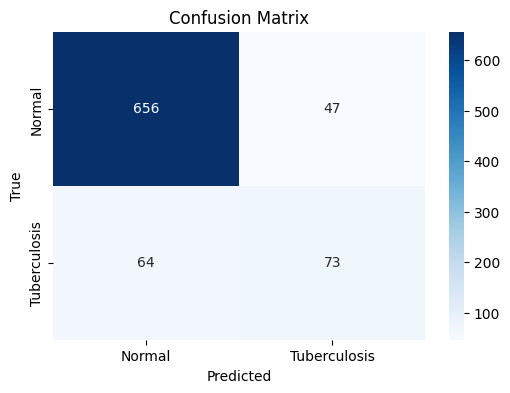

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Tuberculosis'], yticklabels=['Normal', 'Tuberculosis'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


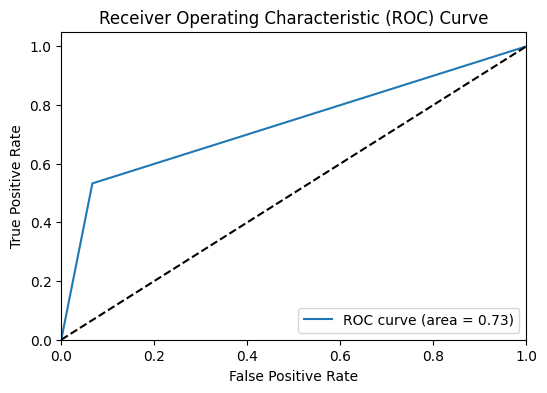

In [45]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predictions)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


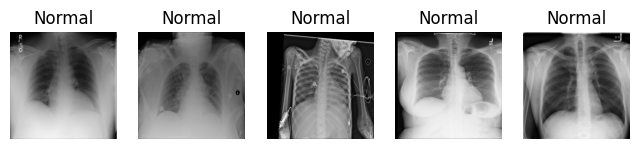

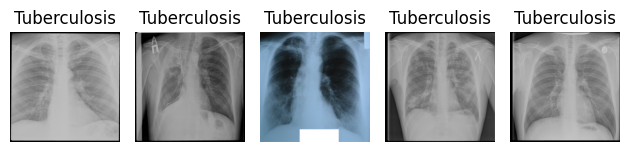

In [44]:
import cv2
import matplotlib.pyplot as plt

# Sample images from each class
num_samples = 5 # Number of samples to visualize
normal_samples = Normal[:num_samples]
tuberculosis_samples = Tuberculosis[:num_samples]

plt.figure(figsize=(8, 8))

# Visualize Normal images
for i, img_path in enumerate(normal_samples):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, num_samples, i + 1)
    plt.imshow(img)
    plt.title("Normal")
    plt.axis('off')
plt.show()
# Visualize Tuberculosis images
for i, img_path in enumerate(tuberculosis_samples):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, num_samples, num_samples + i + 1)
    plt.imshow(img)
    plt.title("Tuberculosis")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [46]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 9.7 MB/s eta 0

In [47]:
import gradio as gr
import numpy as np
class_names=['Normal','Tuberculosis']
def predict_image(img1):
  img1=img1.reshape(224,224,-1)
  img1 = tf.keras.utils.img_to_array(img1)
  img1 = np.expand_dims(img1, axis=0)
  img1 = img1/255
  prediction=model.predict(img1)
  print(prediction)
  m=prediction.flatten()
  if m<0.5:
    d=1-prediction[0]
    print("Normal")
    prediction=np.insert(prediction,0,d)
#     prediction.insert(1,d)

  else:
    d=1-prediction[0]
#     prediction.insert(0,d)
    print("TB")
    prediction=np.insert(prediction,0,d)
  print(prediction)
  for i in range(2):
    print(class_names[i],float(prediction[i]))

  return {class_names[i]: float(prediction[i]) for i in range(2)}

In [48]:
image = gr.inputs.Image(shape=(224,224))
label = gr.outputs.Label(num_top_classes=2)
gr.Interface(fn=predict_image, inputs=image,title="Tuberculosis classification", outputs=label,interpretation='default').launch(debug='True')

<ipython-input-48-d31feb1c76ea>:1: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(224,224))
<ipython-input-48-d31feb1c76ea>:1: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(224,224))
<ipython-input-48-d31feb1c76ea>:2: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label(num_top_classes=2)
<ipython-input-48-d31feb1c76ea>:2: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label(num_top_classes=2)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 187ms/step
[[0.00323162]]
Normal
[0.99676836 0.00323162]
Normal 0.9967683553695679
Tuberculosis 0.0032316241413354874
1/1 [==============================] - 0s 35ms/step
[[0.6471031]]
TB
[0.35289693 0.6471031 ]
Normal 0.35289692878723145
Tuberculosis 0.6471030712127686
1/1 [==============================] - 0s 20ms/step
[[0.04381788]]
Normal
[0.9561821  0.04381788]
Normal 0.9561821222305298
Tuberculosis 0.043817877769470215
Keyboard interruption in main thread... closing server.
